### Predecting employee Attrition

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


{'WA_Fn-UseC_-HR-Employee-Attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,

In [ ]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.describe()

Age    DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000  ...              1470.000000           1470.000000
mean     36.923810   802.485714  ...                 2.187755              4.123129
std       9.135373   403.509100  ...                 3.222430              3.568136
min      18.000000   102.000000  ...                 0.000000              0.000000
25%      30.000000   465.000000  ...                 0.000000              2.000000
50%      36.000000   802.000000  ...                 1.000000              3.000000
75%      43.000000  1157.000000  ...                 3.000000              7.000000
max      60.000000  1499.000000  ...                15.000000             17.000000

[8 rows x 26 columns]

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<Figure size 1440x1080 with 0 Axes>

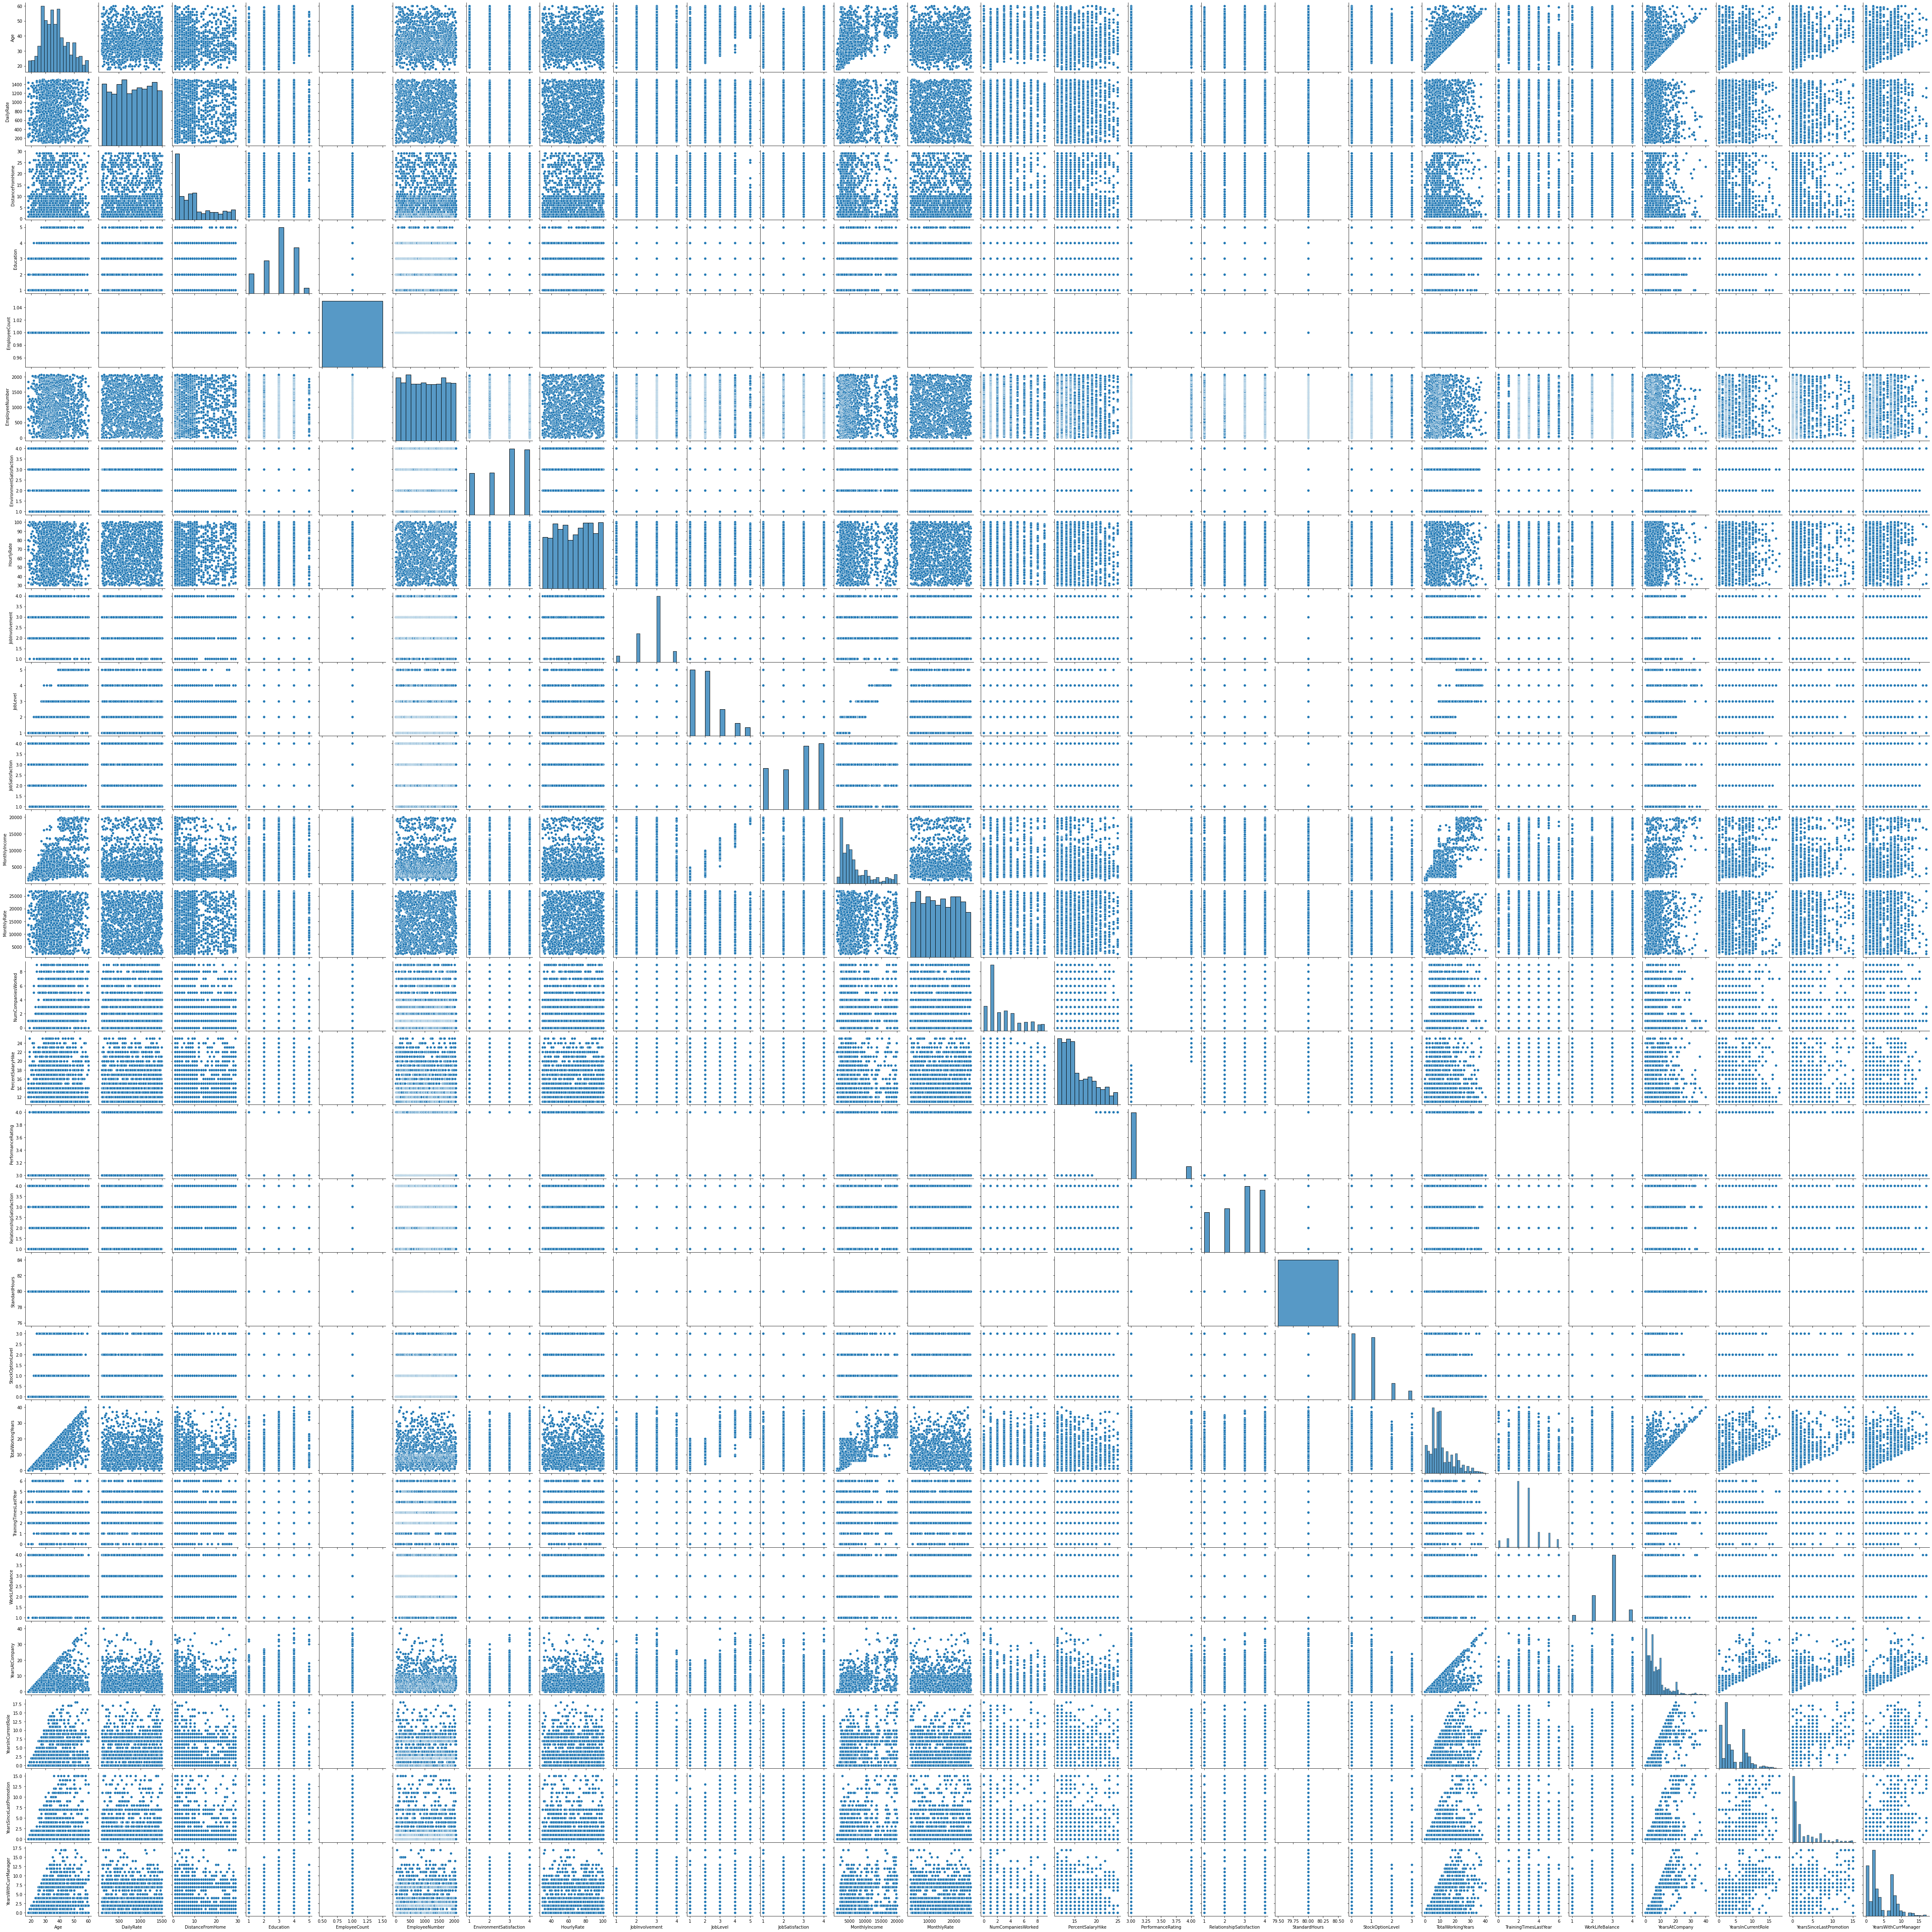

In [ ]:
fig=plt.figure(figsize=(20,15))
sns.pairplot(df)

In [ ]:
df.corr()

Age  ...  YearsWithCurrManager
Age                       1.000000  ...              0.202089
DailyRate                 0.010661  ...             -0.026363
DistanceFromHome         -0.001686  ...              0.014406
Education                 0.208034  ...              0.069065
EmployeeCount                  NaN  ...                   NaN
EmployeeNumber           -0.010145  ...             -0.009197
EnvironmentSatisfaction   0.010146  ...             -0.004999
HourlyRate                0.024287  ...             -0.020123
JobInvolvement            0.029820  ...              0.025976
JobLevel                  0.509604  ...              0.375281
JobSatisfaction          -0.004892  ...             -0.027656
MonthlyIncome             0.497855  ...              0.344079
MonthlyRate               0.028051  ...             -0.036746
NumCompaniesWorked        0.299635  ...             -0.110319
PercentSalaryHike         0.003634  ...             -0.011985
PerformanceRating         0.001904  ...              0.022827
RelationshipSatisfaction  0.053535  ...             -0.000867
StandardHours                  NaN  ...                   NaN
StockOptionLevel          0.037510  ...              0.024698
TotalWorkingYears         0.680381  ...              0.459188
TrainingTimesLastYear    -0.019621  ...             -0.004096
WorkLifeBalance          -0.021490  ...              0.002759
YearsAtCompany            0.311309  ...              0.769212
YearsInCurrentRole        0.212901  ...              0.714365
YearsSinceLastPromotion   0.216513  ...              0.510224
YearsWithCurrManager      0.202089  ...              1.000000

[26 rows x 26 columns]

In [ ]:
df.shape

(1470, 35)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


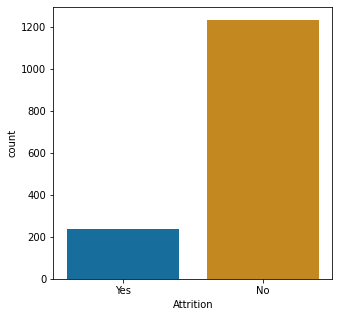

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.countplot(df['Attrition'],palette='colorblind')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


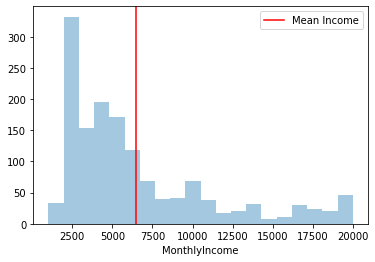

In [ ]:
sns.distplot(df["MonthlyIncome"],kde=False)
mean_inc = df["MonthlyIncome"].mean()
plt.axvline(mean_inc,c="r",label="Mean Income")
plt.legend()
plt.show()

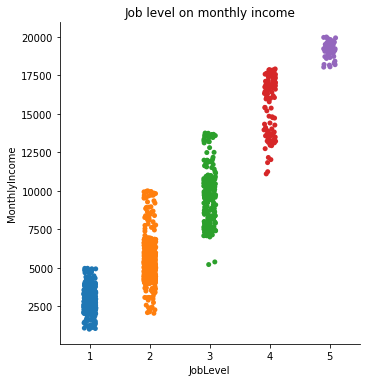

In [ ]:
sns.catplot(x="JobLevel",y="MonthlyIncome",data=df)
plt.title("Job level on monthly income")
plt.show()

<Figure size 360x360 with 0 Axes>

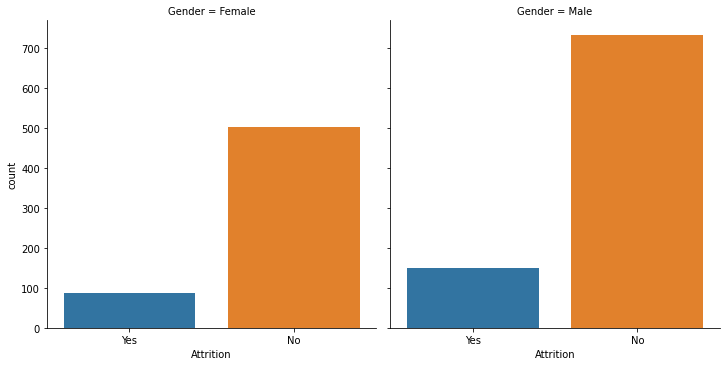

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.catplot(x="Attrition",kind="count",col="Gender",data=df);

In [ ]:
for column in df.columns:
  if df[column].dtype==object:
    print(str(column)+ ' : '+ str(df[column].unique()))
    print(df[column].value_counts())
    print('_______________________________________________')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int

In [ ]:
df=df.drop(['Over18','EmployeeNumber'],axis=1)
df=df.drop(['StandardHours','EmployeeCount'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

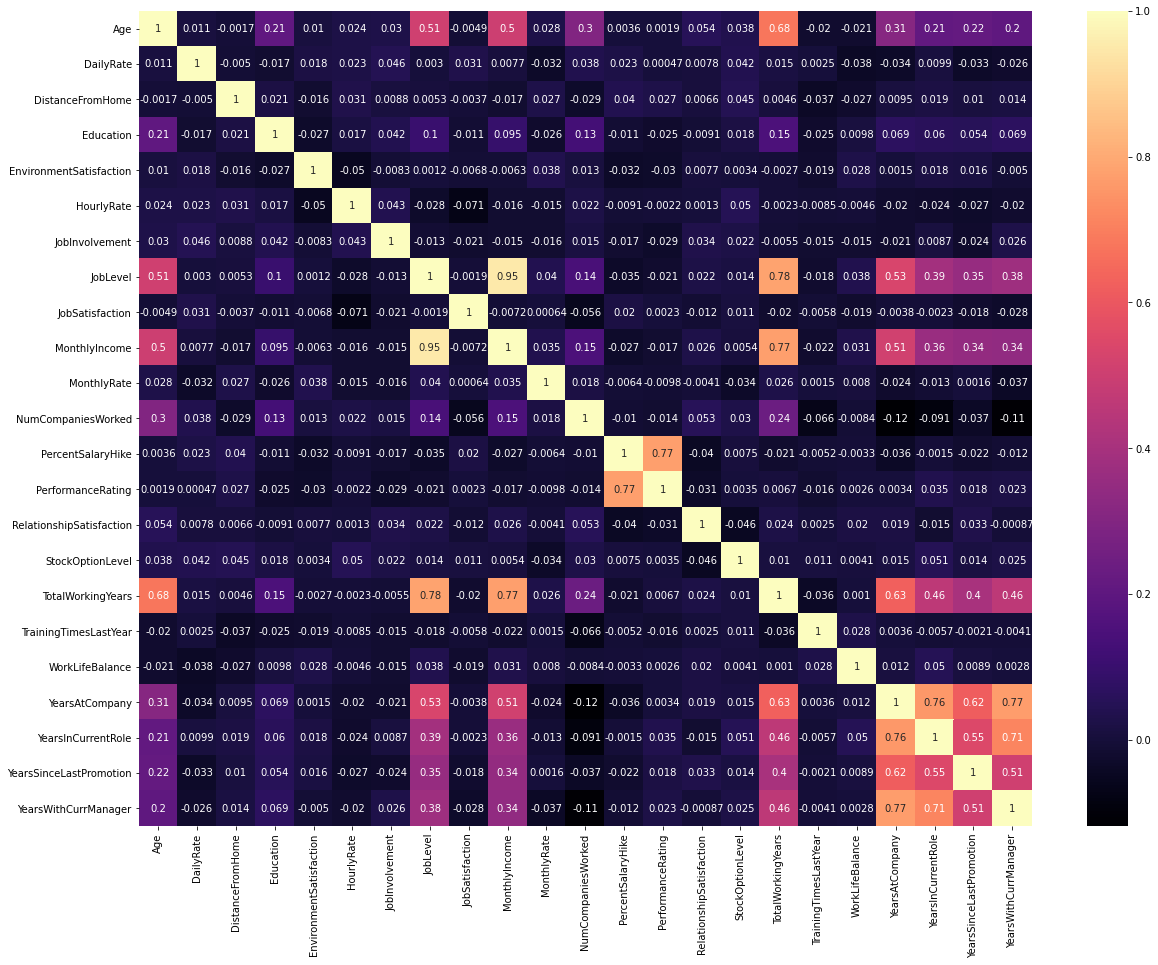

In [ ]:
fig=plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

In [ ]:
df['Age_Years']=df['Age']


In [ ]:
df=df.drop('Age',axis=1)

In [ ]:
df.head()

Attrition  BusinessTravel  ...  YearsWithCurrManager  Age_Years
0          1               2  ...                     5         23
1          0               1  ...                     7         31
2          1               2  ...                     0         19
3          0               1  ...                     0         15
4          0               2  ...                     2          9

[5 rows x 31 columns]

In [ ]:
X=df.drop('Attrition',axis=1)
Y=df['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Applying Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(LR.predict(x_train))

[0 0 0 ... 0 0 0]


In [ ]:
y_pred1=LR.predict(x_test)

In [ ]:
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       320
           1       0.36      0.08      0.14        48

    accuracy                           0.86       368
   macro avg       0.62      0.53      0.53       368
weighted avg       0.81      0.86      0.82       368



In [ ]:
fig=plt.figure(figsize=(5,5))
cf_matrix=confusion_matrix(y_test,y_pred1)
print(cf_matrix)

[[313   7]
 [ 44   4]]


<Figure size 360x360 with 0 Axes>

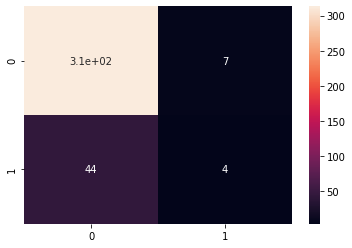

In [ ]:
sns.heatmap(cf_matrix,annot=True)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.8614130434782609


### Applying K-Nearest Neighbors

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=10)

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred5=KNN.predict(x_test)

In [ ]:
cf_matrix=classification_report(y_test,y_pred5)

In [ ]:
print(accuracy_score(y_pred5,y_test))

0.8668478260869565


[[318   2]
 [ 47   1]]


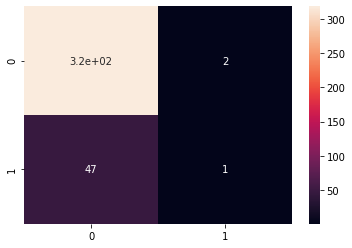

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred5)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

### Applying Decision Trees

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       320
           1       0.26      0.31      0.28        48

    accuracy                           0.79       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.81      0.79      0.80       368



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[277  43]
 [ 33  15]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.7934782608695652


[[277  43]
 [ 33  15]]


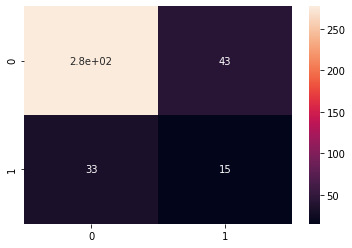

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [ ]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [ ]:
#dot_data=export_graphviz(dt,out_file=None,max_depth = 5 , filled=True , rounded=True,feature_names=x_train.columns)

In [ ]:
#graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
#graph.write_png('dt.png')

True

In [ ]:
x_train.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_Years'],
      dtype='object')

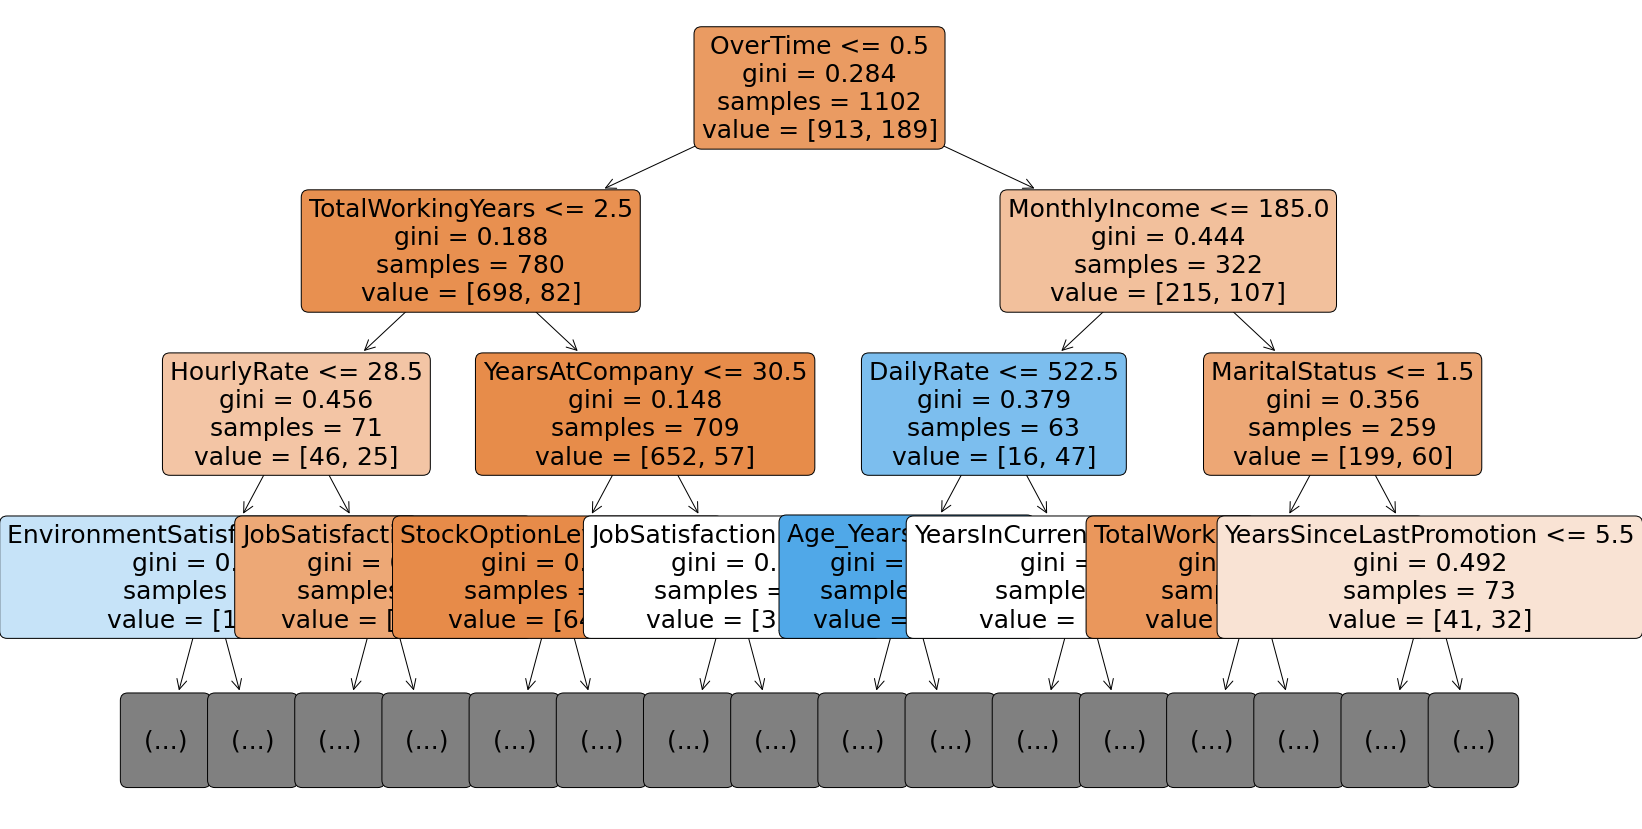

In [ ]:
fig=plt.figure(figsize=(25,15))
A=plot_tree(dt,max_depth = 3 , filled=True , rounded=True,feature_names=x_train.columns,fontsize=25)

### Applying Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10,criterion = 'entropy')
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred2=RF.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[318   2]
 [ 43   5]]


In [ ]:
print(accuracy_score(y_test,y_pred2))

0.8777173913043478


[[318   2]
 [ 43   5]]


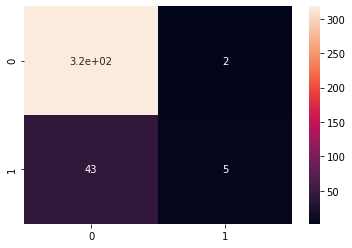

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred2)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

### Applying SVC

In [ ]:
sv=SVC()
sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred6=sv.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,y_pred6))

[[320   0]
 [ 48   0]]


[[320   0]
 [ 48   0]]


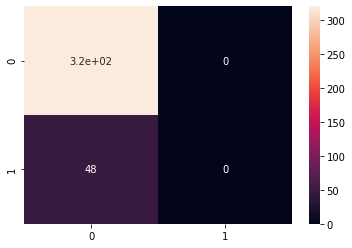

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred6)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.8777173913043478


### Applying Ensemble Techniques like XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
XGB= xgb.XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred4=XGB.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       320
           1       0.69      0.23      0.34        48

    accuracy                           0.89       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.87      0.89      0.86       368



[[315   5]
 [ 37  11]]


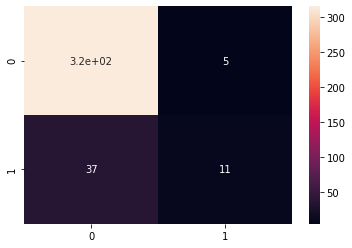

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred4)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

In [ ]:
print(accuracy_score(y_test,y_pred4))

0.8858695652173914


### Applying Cross-Validation on the Boosted model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(XGB, X,Y,scoring="accuracy", cv=10)


In [ ]:
print(scores)

[0.84353741 0.85714286 0.88435374 0.84353741 0.88435374 0.84353741
 0.85034014 0.89795918 0.8707483  0.89115646]


In [ ]:
scores.mean()

0.8666666666666668